In [47]:
using Pkg

In [48]:
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("Query")
Pkg.add("CSV")
Pkg.add("ScikitLearn")
Pkg.add("Statistics")

  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versi

In [49]:
# Import required packages
using DataFrames, CSV, Plots, Query,StatsPlots,ScikitLearn,Statistics

In [50]:
# Dataframe showing is limited by default. I needed to change environment variable to access showing all variables.
ENV["COLUMNS"] = 1000

1000

In [51]:
# Import DataFrame
churn_df = DataFrame!(CSV.File("telecom.csv"))

7043×21 DataFrame
│ Row  │ customerID │ gender │ SeniorCitizen │ Partner │ Dependents │ tenure │ PhoneService │ MultipleLines    │ InternetService │ OnlineSecurity      │ OnlineBackup        │ DeviceProtection    │ TechSupport         │ StreamingTV         │ StreamingMovies     │ Contract       │ PaperlessBilling │ PaymentMethod             │ MonthlyCharges │ TotalCharges │ Churn  │
│      │ String     │ String │ Int64         │ String  │ String     │ Int64  │ String       │ String           │ String          │ String              │ String              │ String              │ String              │ String              │ String              │ String         │ String           │ String                    │ Float64        │ String       │ String │
├──────┼────────────┼────────┼───────────────┼─────────┼────────────┼────────┼──────────────┼──────────────────┼─────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼────────────────┼──────────────────┼───────────────────────────┼────────────────┼──────────────┼────────┤
│ 1    │ 7590-VHVEG │ Female │ 0             │ Yes     │ No         │ 1      │ No           │ No phone service │ DSL             │ No                  │ Yes                 │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │ Electronic check          │ 29.85          │ 29.85        │ No     │
│ 2    │ 5575-GNVDE │ Male   │ 0             │ No      │ No         │ 34     │ Yes          │ No               │ DSL             │ Yes                 │ No                  │ Yes                 │ No                  │ No                  │ No                  │ One year       │ No               │ Mailed check              │ 56.95          │ 1889.5       │ No     │
│ 3    │ 3668-QPYBK │ Male   │ 0             │ No      │ No         │ 2      │ Yes          │ No               │ DSL             │ Yes                 │ Yes                 │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │ Mailed check              │ 53.85          │ 108.15       │ Yes    │
│ 4    │ 7795-CFOCW │ Male   │ 0             │ No      │ No         │ 45     │ No           │ No phone service │ DSL             │ Yes                 │ No                  │ Yes                 │ Yes                 │ No                  │ No                  │ One year       │ No               │ Bank transfer (automatic) │ 42.3           │ 1840.75      │ No     │
│ 5    │ 9237-HQITU │ Female │ 0             │ No      │ No         │ 2      │ Yes          │ No               │ Fiber optic     │ No                  │ No                  │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │ Electronic check          │ 70.7           │ 151.65       │ Yes    │
│ 6    │ 9305-CDSKC │ Female │ 0             │ No      │ No         │ 8      │ Yes          │ Yes              │ Fiber optic     │ No                  │ No                  │ Yes                 │ No                  │ Yes                 │ Yes                 │ Month-to-month │ Yes              │ Electronic check          │ 99.65          │ 820.5        │ Yes    │
│ 7    │ 1452-KIOVK │ Male   │ 0             │ No      │ Yes        │ 22     │ Yes          │ Yes              │ Fiber optic     │ No                  │ Yes                 │ No                  │ No                  │ Yes                 │ No                  │ Month-to-month │ Yes              │ Credit card (automatic)   │ 89.1           │ 1949.4       │ No     │
│ 8    │ 6713-OKOMC │ Female │ 0             │ No      │ No         │ 10     │ No           │ No phone service │ DSL             │ Yes                 │ No                  │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ No               │ Mai

In [52]:
# Look columns statistical values and types
describe(churn_df)

21×8 DataFrame
│ Row │ variable         │ mean     │ min                       │ median │ max          │ nunique │ nmissing │ eltype   │
│     │ Symbol           │ Union…   │ Any                       │ Union… │ Any          │ Union…  │ Nothing  │ DataType │
├─────┼──────────────────┼──────────┼───────────────────────────┼────────┼──────────────┼─────────┼──────────┼──────────┤
│ 1   │ customerID       │          │ 0002-ORFBO                │        │ 9995-HOTOH   │ 7043    │          │ String   │
│ 2   │ gender           │          │ Female                    │        │ Male         │ 2       │          │ String   │
│ 3   │ SeniorCitizen    │ 0.162147 │ 0                         │ 0.0    │ 1            │         │          │ Int64    │
│ 4   │ Partner          │          │ No                        │        │ Yes          │ 2       │          │ String   │
│ 5   │ Dependents       │          │ No                        │        │ Yes          │ 2       │          │ String   │
│ 6   │ tenure           │ 32.3711  │ 0                         │ 29.0   │ 72           │         │          │ Int64    │
│ 7   │ PhoneService     │          │ No                        │        │ Yes          │ 2       │          │ String   │
│ 8   │ MultipleLines    │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 9   │ InternetService  │          │ DSL                       │        │ No           │ 3       │          │ String   │
│ 10  │ OnlineSecurity   │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 11  │ OnlineBackup     │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 12  │ DeviceProtection │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 13  │ TechSupport      │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 14  │ StreamingTV      │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 15  │ StreamingMovies  │          │ No                        │        │ Yes          │ 3       │          │ String   │
│ 16  │ Contract         │          │ Month-to-month            │        │ Two year     │ 3       │          │ String   │
│ 17  │ PaperlessBilling │          │ No                        │        │ Yes          │ 2       │          │ String   │
│ 18  │ PaymentMethod    │          │ Bank transfer (automatic) │        │ Mailed check │ 4       │          │ String   │
│ 19  │ MonthlyCharges   │ 64.7617  │ 18.25                     │ 70.35  │ 118.75       │         │          │ Float64  │
│ 20  │ TotalCharges     │          │                           │        │ 999.9        │ 6531    │          │ String   │
│ 21  │ Churn            │          │ No                        │        │ Yes          │ 2       │          │ String   │

In [53]:
col_to_analyze = [x for x in names(churn_df) if x ∉ ["tenure","MonthlyCharges","TotalCharges","Churn","customerID"]]

16-element Array{String,1}:
 "gender"
 "SeniorCitizen"
 "Partner"
 "Dependents"
 "PhoneService"
 "MultipleLines"
 "InternetService"
 "OnlineSecurity"
 "OnlineBackup"
 "DeviceProtection"
 "TechSupport"
 "StreamingTV"
 "StreamingMovies"
 "Contract"
 "PaperlessBilling"
 "PaymentMethod"

In [54]:
# Using list comprehesions, making which columns to categorical because we are going to encode them.
col_to_ix = [x for x in names(churn_df) if x ∉ ["tenure","MonthlyCharges","TotalCharges","Churn","customerID",
                "SeniorCitizen"]]

15-element Array{String,1}:
 "gender"
 "Partner"
 "Dependents"
 "PhoneService"
 "MultipleLines"
 "InternetService"
 "OnlineSecurity"
 "OnlineBackup"
 "DeviceProtection"
 "TechSupport"
 "StreamingTV"
 "StreamingMovies"
 "Contract"
 "PaperlessBilling"
 "PaymentMethod"

In [55]:
churn_df.Churn

7043-element CSV.Column{String,PooledString}:
 "No"
 "No"
 "Yes"
 "No"
 "Yes"
 "Yes"
 "No"
 "No"
 "Yes"
 "No"
 "No"
 "No"
 "No"
 ⋮
 "No"
 "Yes"
 "No"
 "Yes"
 "No"
 "No"
 "No"
 "No"
 "No"
 "No"
 "Yes"
 "No"

In [56]:
# First we are going to label encode target value, churn.
s_indexer = Dict("Yes"=>1,"No"=>0)

Dict{String,Int64} with 2 entries:
  "Yes" => 1
  "No"  => 0

In [57]:
# It works :)
s_indexer["Yes"]

1

In [58]:
# Mapping all values of column respect to the dictionary we defined above.
churn_df.Churn = map(x-> s_indexer[x],churn_df.Churn)

7043-element Array{Int64,1}:
 0
 0
 1
 0
 1
 1
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 1
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0

In [59]:
# I write a function , so I can make this mapper which column I want later.
function b_string_ixer(col)
    map(x-> s_indexer[x],churn_df[col])
end

b_string_ixer (generic function with 1 method)

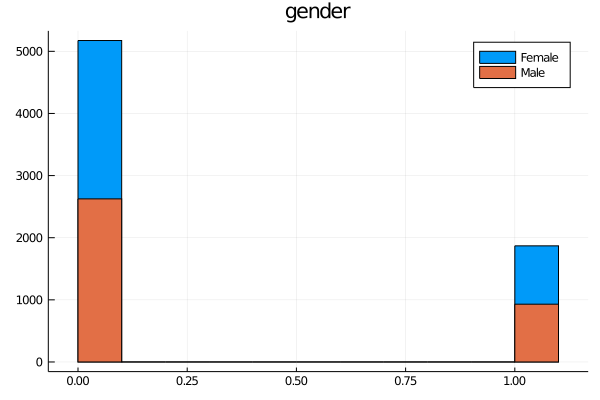

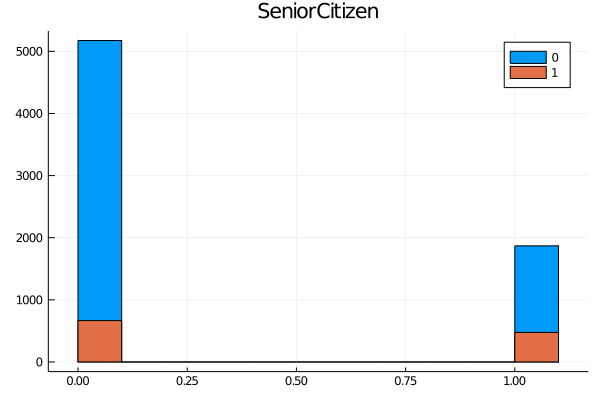

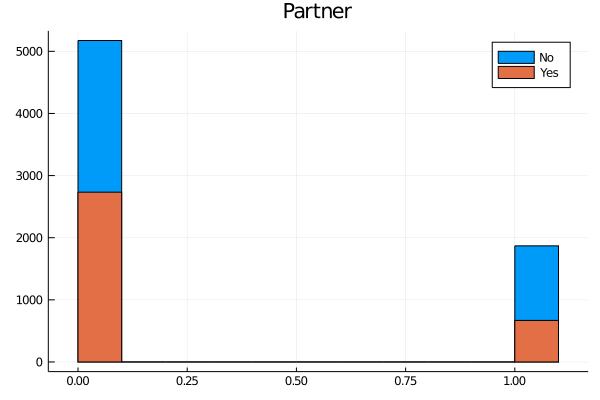

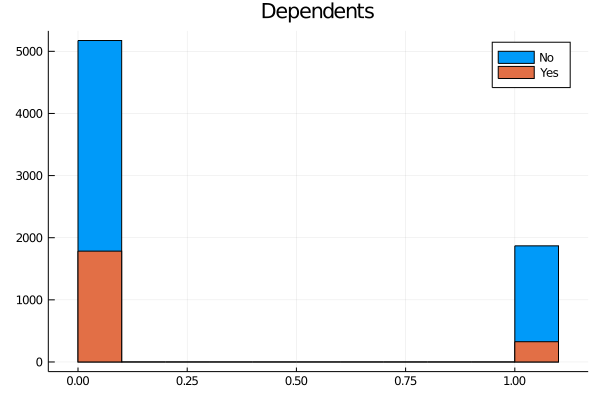

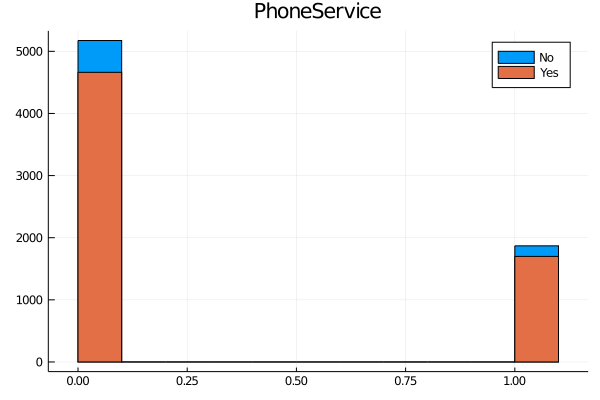

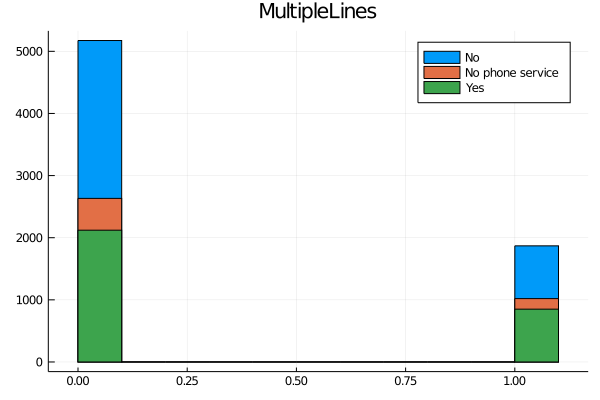

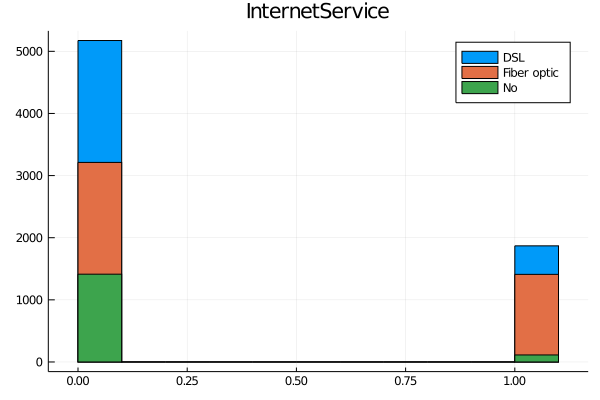

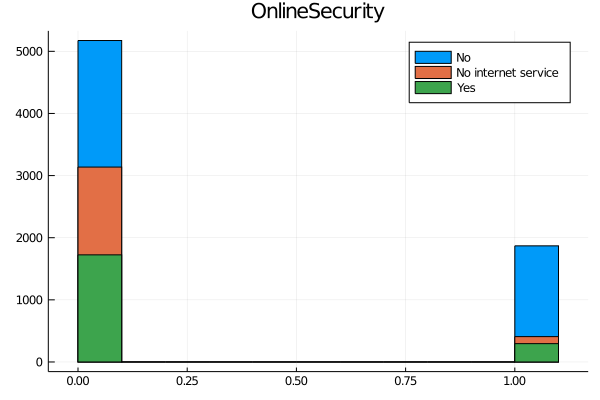

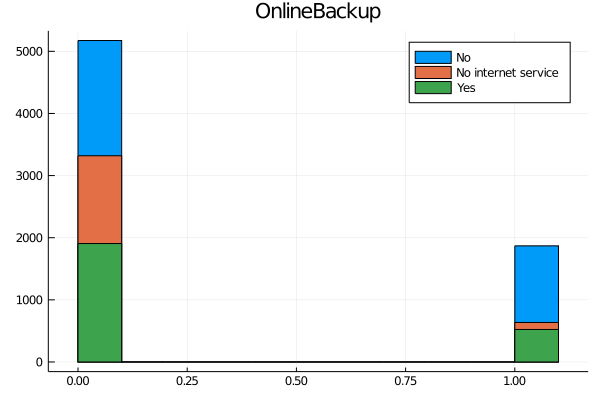

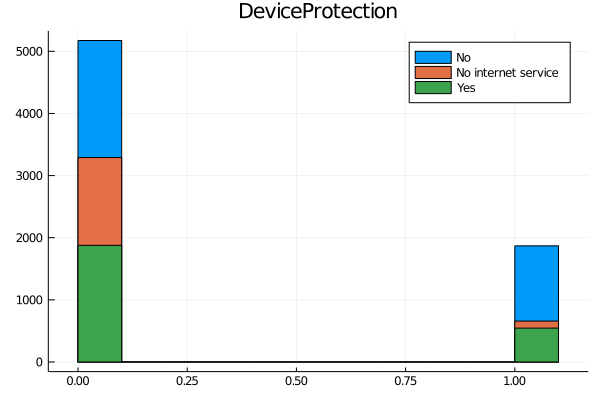

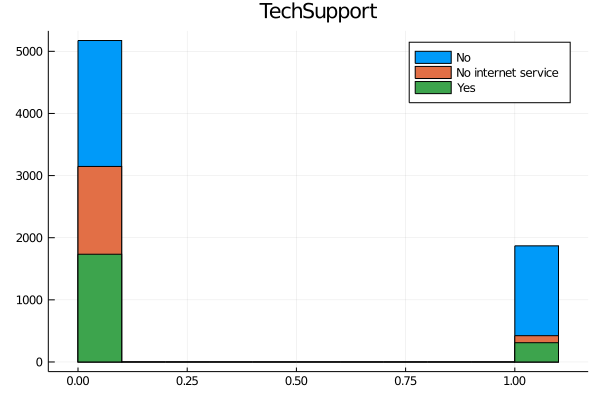

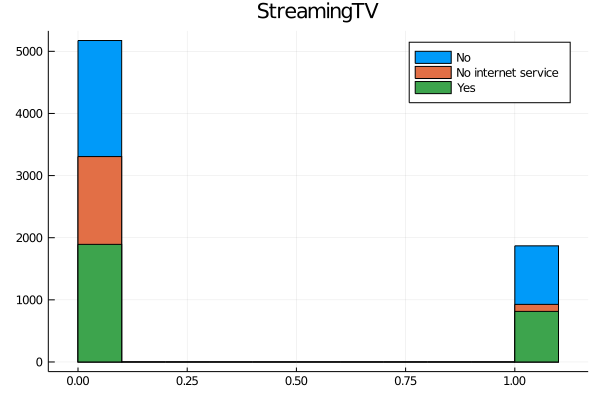

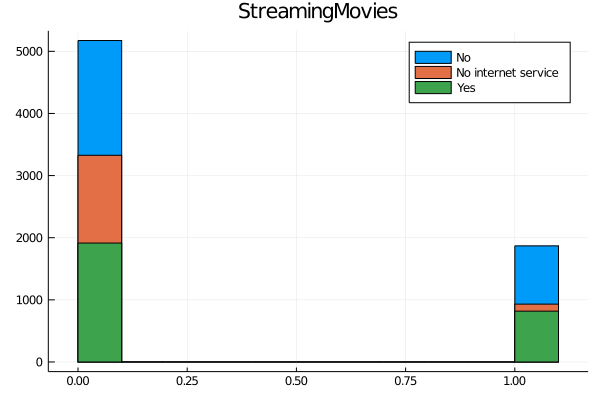

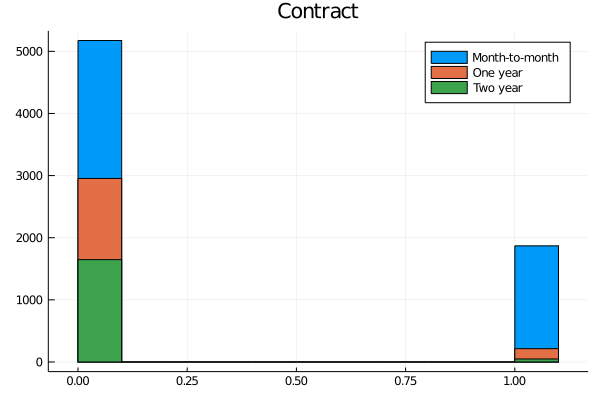

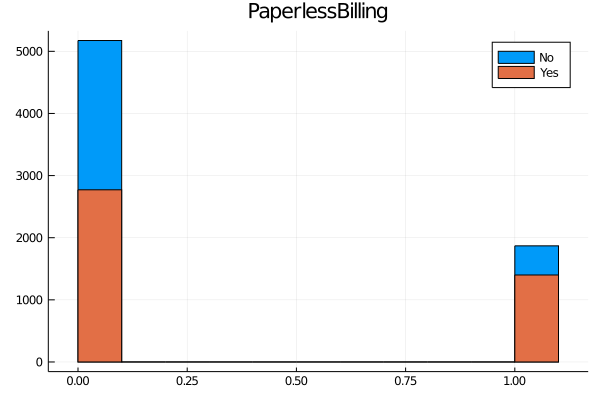

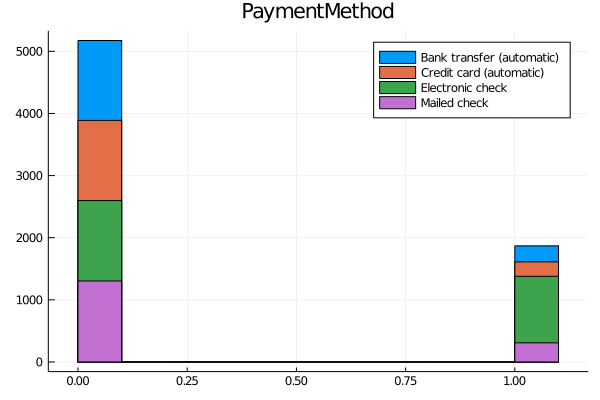

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::var"#41#42"{String})(::DataFrame) at none:0
└ @ Main .\none:0


In [60]:
# In order to gain insight from data, I used StackedBar by grouping churn and not churn of data.
for vl in col_to_analyze
    display(@df churn_df StatsPlots.groupedhist(:Churn, group = churn_df[vl], bar_position = :stack,title=vl))
end

In [61]:
#= 
CONCLUSIONS FOR CHURNED CUSTOMERS
1-) GENDER DOESN'T SEEM SIGNIFICANTLY IMPORTANT
2-) IF CUSTOMER CHURNED, THERE ARE A LOT OF CUSTOMER WHO HASN'T DEPENDENT.
3-) THERE CAN BE A PATTERN FOR INTERNET SERVICE BECAUSE FIBER OPTIC USERS A LOT IF CUSTOMER IS CHURNED.
4-) CHURNED USER MOSTLY DOESN'T HAVE ONLINE SECURITY.
5-) CHURNED USER MOSTLY DOESN'T HAVE ONLINE BACKUP.
7-) CHURNED USER PROBABLY PAY MONTH-TO-MONTH.
=#

In [62]:
# CREATING BASELINE MODEL

In [63]:
# Extracting column names in Julia.
names(churn_df)

21-element Array{String,1}:
 "customerID"
 "gender"
 "SeniorCitizen"
 "Partner"
 "Dependents"
 "tenure"
 "PhoneService"
 "MultipleLines"
 "InternetService"
 "OnlineSecurity"
 "OnlineBackup"
 "DeviceProtection"
 "TechSupport"
 "StreamingTV"
 "StreamingMovies"
 "Contract"
 "PaperlessBilling"
 "PaymentMethod"
 "MonthlyCharges"
 "TotalCharges"
 "Churn"

In [64]:
# In TotalCharges column couldn't be able to transform, in case of possible missing values, mapping missing values and filling 
# with required values solved the problem.
churn_df[:TotalCharges]  = map(x -> length(x) == 1 ? "0.0" : x, churn_df[:TotalCharges])
churn_df[:TotalCharges]  = map(x -> length(x) == 0 ? "0.0" : x, churn_df[:TotalCharges])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[64]:1
└ @ Core In[64]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[64]:1
└ @ Core In[64]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[64]:4
└ @ Core In[64]:4
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[64]:4
└ @ Core In[64]:4


7043-element Array{String,1}:
 "29.85"
 "1889.5"
 "108.15"
 "1840.75"
 "151.65"
 "820.5"
 "1949.4"
 "301.9"
 "3046.05"
 "3487.95"
 "587.45"
 "326.8"
 "5681.1"
 ⋮
 "3316.1"
 "75.75"
 "2625.25"
 "6886.25"
 "1495.1"
 "743.3"
 "1419.4"
 "1990.5"
 "7362.9"
 "346.45"
 "306.6"
 "6844.5"

In [65]:
# Convert values String to Float.
churn_df[:TotalCharges] = parse.(Float64,churn_df[:TotalCharges])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[65]:1
└ @ Core In[65]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[65]:1
└ @ Core In[65]:1


7043-element Array{Float64,1}:
   29.85
 1889.5
  108.15
 1840.75
  151.65
  820.5
 1949.4
  301.9
 3046.05
 3487.95
  587.45
  326.8
 5681.1
    ⋮
 3316.1
   75.75
 2625.25
 6886.25
 1495.1
  743.3
 1419.4
 1990.5
 7362.9
  346.45
  306.6
 6844.5

In [66]:
# Creating which columns are going to be predictors.
col_to_pred = [x for x in names(churn_df) if x ∉ ["Churn","customerID"]]

19-element Array{String,1}:
 "gender"
 "SeniorCitizen"
 "Partner"
 "Dependents"
 "tenure"
 "PhoneService"
 "MultipleLines"
 "InternetService"
 "OnlineSecurity"
 "OnlineBackup"
 "DeviceProtection"
 "TechSupport"
 "StreamingTV"
 "StreamingMovies"
 "Contract"
 "PaperlessBilling"
 "PaymentMethod"
 "MonthlyCharges"
 "TotalCharges"

In [67]:
# Which values going to be one-hot-encoded.. If there is binary categorical variables, we can make them label encoded.
# If multi-cat, needed to be one hot encoded.
churn_df[:,9:17]

7043×9 DataFrame
│ Row  │ InternetService │ OnlineSecurity      │ OnlineBackup        │ DeviceProtection    │ TechSupport         │ StreamingTV         │ StreamingMovies     │ Contract       │ PaperlessBilling │
│      │ String          │ String              │ String              │ String              │ String              │ String              │ String              │ String         │ String           │
├──────┼─────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼─────────────────────┼────────────────┼──────────────────┤
│ 1    │ DSL             │ No                  │ Yes                 │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │
│ 2    │ DSL             │ Yes                 │ No                  │ Yes                 │ No                  │ No                  │ No                  │ One year       │ No               │
│ 3    │ DSL             │ Yes                 │ Yes                 │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │
│ 4    │ DSL             │ Yes                 │ No                  │ Yes                 │ Yes                 │ No                  │ No                  │ One year       │ No               │
│ 5    │ Fiber optic     │ No                  │ No                  │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │
│ 6    │ Fiber optic     │ No                  │ No                  │ Yes                 │ No                  │ Yes                 │ Yes                 │ Month-to-month │ Yes              │
│ 7    │ Fiber optic     │ No                  │ Yes                 │ No                  │ No                  │ Yes                 │ No                  │ Month-to-month │ Yes              │
│ 8    │ DSL             │ Yes                 │ No                  │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ No               │
│ 9    │ Fiber optic     │ No                  │ No                  │ Yes                 │ Yes                 │ Yes                 │ Yes                 │ Month-to-month │ Yes              │
│ 10   │ DSL             │ Yes                 │ Yes                 │ No                  │ No                  │ No                  │ No                  │ One year       │ No               │
⋮
│ 7033 │ Fiber optic     │ No                  │ No                  │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │
│ 7034 │ Fiber optic     │ No                  │ No                  │ No                  │ No                  │ No                  │ No                  │ Month-to-month │ Yes              │
│ 7035 │ Fiber optic     │ Yes                 │ Yes                 │ Yes                 │ No                  │ Yes                 │ No                  │ Month-to-month │ Yes              │
│ 7036 │ Fiber optic     │ No                  │ No                  │ No                  │ No                  │ Yes                 │ No                  │ Month-to-month │ Yes              │
│ 7037 │ DSL             │ No                  │ Yes                 │ Yes                 │ Yes                 │ Yes                 │ Yes                 │ One year       │ No               │
│ 7038 │ No              │ No internet service │ No internet service │ No internet service │ No internet service │ No internet service │ No internet service │ Two year       │ Yes              │
│ 7039 │ DSL             │ Yes                 │ No                  │ Yes                 │ Yes                 │ Yes                 │ Yes                 │ One year       │ Yes              │
│ 7040 │ Fiber optic     │ No                  │ Yes                 │ Yes       

In [68]:
# Since the values are going to be columns, space need to be converted to underscore in order to be accessible.
for colname in names(churn_df[:,10:15])
    churn_df[colname] = map(x-> x== "No internet service" ? "N_internet_service" : x ,churn_df[colname])
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[68]:3
└ @ Core In[68]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[68]:3
└ @ Core In[68]:3


In [69]:
# Same as we did above.
churn_df.MultipleLines =  map(x-> x== "No phone service" ? "N_phone_service" : x ,churn_df["MultipleLines"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[69]:1
└ @ Core In[69]:1


7043-element Array{String,1}:
 "N_phone_service"
 "No"
 "No"
 "N_phone_service"
 "No"
 "Yes"
 "Yes"
 "N_phone_service"
 "Yes"
 "No"
 "No"
 "No"
 "Yes"
 ⋮
 "Yes"
 "Yes"
 "No"
 "Yes"
 "No"
 "N_phone_service"
 "No"
 "Yes"
 "Yes"
 "N_phone_service"
 "Yes"
 "No"

In [70]:
# Same as we did above. Month-to-month has seperable inside its string, but anothers haven't. We focused anothers.
contract_vals = Dict("One year" =>"One_year","Two year"=>"Two_year")
churn_df["Contract"] = map(x-> x == "Month-to-month" ? x : contract_vals[x] ,churn_df["Contract"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[70]:3
└ @ Core In[70]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[70]:3
└ @ Core In[70]:3


7043-element Array{String,1}:
 "Month-to-month"
 "One_year"
 "Month-to-month"
 "One_year"
 "Month-to-month"
 "Month-to-month"
 "Month-to-month"
 "Month-to-month"
 "Month-to-month"
 "One_year"
 "Month-to-month"
 "Two_year"
 "One_year"
 ⋮
 "One_year"
 "Month-to-month"
 "Month-to-month"
 "Month-to-month"
 "Month-to-month"
 "One_year"
 "Two_year"
 "One_year"
 "One_year"
 "Month-to-month"
 "Month-to-month"
 "Two_year"

In [71]:
unique(churn_df.PaymentMethod)

4-element Array{String,1}:
 "Electronic check"
 "Mailed check"
 "Bank transfer (automatic)"
 "Credit card (automatic)"

In [72]:
# Making Payment Method Column underscored.
payment_vals = Dict("Electronic check"=>"Electronic_check","Mailed check"=>"Mailed_check",
    "Bank transfer (automatic)"=>"Bank_transfer","Credit card (automatic)"=>"Credit_card")
churn_df["PaymentMethod"] = map(x-> payment_vals[x] ,churn_df["PaymentMethod"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[72]:4
└ @ Core In[72]:4
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[72]:4
└ @ Core In[72]:4


7043-element Array{String,1}:
 "Electronic_check"
 "Mailed_check"
 "Mailed_check"
 "Bank_transfer"
 "Electronic_check"
 "Electronic_check"
 "Credit_card"
 "Mailed_check"
 "Electronic_check"
 "Bank_transfer"
 "Mailed_check"
 "Credit_card"
 "Credit_card"
 ⋮
 "Credit_card"
 "Electronic_check"
 "Credit_card"
 "Credit_card"
 "Bank_transfer"
 "Electronic_check"
 "Bank_transfer"
 "Mailed_check"
 "Credit_card"
 "Electronic_check"
 "Mailed_check"
 "Bank_transfer"

In [73]:
churn_df = select(churn_df,Not(:gender))

7043×20 DataFrame
│ Row  │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PhoneService │ MultipleLines   │ InternetService │ OnlineSecurity     │ OnlineBackup       │ DeviceProtection   │ TechSupport        │ StreamingTV        │ StreamingMovies    │ Contract       │ PaperlessBilling │ PaymentMethod    │ MonthlyCharges │ TotalCharges │ Churn │
│      │ String     │ Int64         │ String  │ String     │ Int64  │ String       │ String          │ String          │ String             │ String             │ String             │ String             │ String             │ String             │ String         │ String           │ String           │ Float64        │ Float64      │ Int64 │
├──────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────┼─────────────────┼─────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────────┼────────────────┼──────────────────┼──────────────────┼────────────────┼──────────────┼───────┤
│ 1    │ 7590-VHVEG │ 0             │ Yes     │ No         │ 1      │ No           │ N_phone_service │ DSL             │ No                 │ Yes                │ No                 │ No                 │ No                 │ No                 │ Month-to-month │ Yes              │ Electronic_check │ 29.85          │ 29.85        │ 0     │
│ 2    │ 5575-GNVDE │ 0             │ No      │ No         │ 34     │ Yes          │ No              │ DSL             │ Yes                │ No                 │ Yes                │ No                 │ No                 │ No                 │ One_year       │ No               │ Mailed_check     │ 56.95          │ 1889.5       │ 0     │
│ 3    │ 3668-QPYBK │ 0             │ No      │ No         │ 2      │ Yes          │ No              │ DSL             │ Yes                │ Yes                │ No                 │ No                 │ No                 │ No                 │ Month-to-month │ Yes              │ Mailed_check     │ 53.85          │ 108.15       │ 1     │
│ 4    │ 7795-CFOCW │ 0             │ No      │ No         │ 45     │ No           │ N_phone_service │ DSL             │ Yes                │ No                 │ Yes                │ Yes                │ No                 │ No                 │ One_year       │ No               │ Bank_transfer    │ 42.3           │ 1840.75      │ 0     │
│ 5    │ 9237-HQITU │ 0             │ No      │ No         │ 2      │ Yes          │ No              │ Fiber optic     │ No                 │ No                 │ No                 │ No                 │ No                 │ No                 │ Month-to-month │ Yes              │ Electronic_check │ 70.7           │ 151.65       │ 1     │
│ 6    │ 9305-CDSKC │ 0             │ No      │ No         │ 8      │ Yes          │ Yes             │ Fiber optic     │ No                 │ No                 │ Yes                │ No                 │ Yes                │ Yes                │ Month-to-month │ Yes              │ Electronic_check │ 99.65          │ 820.5        │ 1     │
│ 7    │ 1452-KIOVK │ 0             │ No      │ Yes        │ 22     │ Yes          │ Yes             │ Fiber optic     │ No                 │ Yes                │ No                 │ No                 │ Yes                │ No                 │ Month-to-month │ Yes              │ Credit_card      │ 89.1           │ 1949.4       │ 0     │
│ 8    │ 6713-OKOMC │ 0             │ No      │ No         │ 10     │ No           │ N_phone_service │ DSL             │ Yes                │ No                 │ No                 │ No                 │ No                 │ No                 │ Month-to-month │ No               │ Mailed_check     │ 29.75          │ 301.9        │ 0     │
│ 9    │ 7892-POOKP │ 0             │ Yes     │ No         │ 28     │ Yes          │ Yes             │ Fiber optic     │ No                 │ No                 │ Yes                │ Yes                │ Yes            

In [74]:
binary_ixer = Dict("Yes"=>1.0,"No"=>0.0,"Female"=>0.0,"Male"=>1.0,0=>0.0,1=>1.0)
for vl in ["Partner","Dependents","PhoneService","PaperlessBilling","Dependents"]
    churn_df[vl] = map(x->binary_ixer[x],churn_df[vl])
end    

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[74]:3
└ @ Core In[74]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[74]:3
└ @ Core In[74]:3


In [75]:
# There is No Stable Method For Getting Dummies and Making OneHotEncoder is Simple. But I coded a function using 
# Sklearn for Julia and Flux.jl package. I used Flux at the end.

In [76]:
@sk_import preprocessing: OneHotEncoder

PyObject <class 'sklearn.preprocessing._encoders.OneHotEncoder'>

In [77]:
function encode_multi_cat(catname)
    mapper = DataFrameMapper([([Symbol(catname)], OneHotEncoder(sparse=false))])
    multiple_vals = Symbol[]
    
    for vl in unique(churn_df[catname])
        push!(multiple_vals, Symbol(string(catname,"_",vl)))
    end

    vls = fit_transform!(mapper, churn_df)
    test_df1 = convert(DataFrame, vls)
    
    return rename(test_df1,multiple_vals)
end

encode_multi_cat (generic function with 1 method)

In [78]:
function oneHotTransformer(colname)
    multiple_vals = Symbol[]
    
    for vl in unique(churn_df[colname])
        push!(multiple_vals, Symbol(string(colname,"_",vl)))
    end
    
    pre_df = convert(DataFrame,transpose(Flux.onehotbatch(Symbol.(churn_df[colname]),Symbol.(unique(churn_df[colname])))))
    return rename(pre_df,multiple_vals)
end

oneHotTransformer (generic function with 1 method)

In [79]:
# Adding dependencies for Flux and importing it.
Pkg.add("Flux")
using Flux

  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [80]:
# Making the right way, using reverse way :P 
not_multi_cats = ["customerID","gender","SeniorCitizen","Partner","Dependents","tenure","PaperlessBilling","MonthlyCharges",
"TotalCharges","Churn","PhoneService"]

11-element Array{String,1}:
 "customerID"
 "gender"
 "SeniorCitizen"
 "Partner"
 "Dependents"
 "tenure"
 "PaperlessBilling"
 "MonthlyCharges"
 "TotalCharges"
 "Churn"
 "PhoneService"

In [81]:
# Reverse Engineering using Julia symbols..
multi_cats = [x for x in names(churn_df) if x ∉ not_multi_cats]

10-element Array{String,1}:
 "MultipleLines"
 "InternetService"
 "OnlineSecurity"
 "OnlineBackup"
 "DeviceProtection"
 "TechSupport"
 "StreamingTV"
 "StreamingMovies"
 "Contract"
 "PaymentMethod"

In [82]:
# Declaring a function, so it can be used by just a passing a parameter. ! Operator is similar to inplace=True in Pandas.
# It is like df = old_df with some operations.
function one_hot_enc_mult(cat_col)
    transformed_df = oneHotTransformer(cat_col)
    to_mult = names(transformed_df)
    for vl1 in to_mult
        churn_df[vl1] = transformed_df[vl1]
    end
    select!(churn_df,Not(cat_col))
end

one_hot_enc_mult (generic function with 1 method)

In [83]:
# Deprecations are bad. Don't use like I did here. I had deadline...
for cat in multi_cats
    one_hot_enc_mult(cat)
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = oneHotTransformer(::String) at In[78]:4
└ @ Main .\In[78]:4
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = oneHotTransformer(::String) at In[78]:8
└ @ Main .\In[78]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = oneHotTransformer(::String) at In[78]:8
└ @ Main .\In[78]:8
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = one_hot_enc_mult(::String) at In[82]:7
└ @ Main .\In[82]:7
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = one_hot_enc_mult(::String) at In[82]:7
└ @ Main .\In[82]:7
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is depr

In [84]:
first(churn_df[11:33],5)

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[84]:1
└ @ Core In[84]:1


5×23 DataFrame
│ Row │ MultipleLines_N_phone_service │ MultipleLines_No │ MultipleLines_Yes │ InternetService_DSL │ InternetService_Fiber optic │ InternetService_No │ OnlineSecurity_No │ OnlineSecurity_Yes │ OnlineSecurity_N_internet_service │ OnlineBackup_Yes │ OnlineBackup_No │ OnlineBackup_N_internet_service │ DeviceProtection_No │ DeviceProtection_Yes │ DeviceProtection_N_internet_service │ TechSupport_No │ TechSupport_Yes │ TechSupport_N_internet_service │ StreamingTV_No │ StreamingTV_Yes │ StreamingTV_N_internet_service │ StreamingMovies_No │ StreamingMovies_Yes │
│     │ Bool                          │ Bool             │ Bool              │ Bool                │ Bool                        │ Bool               │ Bool              │ Bool               │ Bool                              │ Bool             │ Bool            │ Bool                            │ Bool                │ Bool                 │ Bool                                │ Bool           │ Bool            │ Bool                           │ Bool           │ Bool            │ Bool                           │ Bool               │ Bool                │
├─────┼───────────────────────────────┼──────────────────┼───────────────────┼─────────────────────┼─────────────────────────────┼────────────────────┼───────────────────┼────────────────────┼───────────────────────────────────┼──────────────────┼─────────────────┼─────────────────────────────────┼─────────────────────┼──────────────────────┼─────────────────────────────────────┼────────────────┼─────────────────┼────────────────────────────────┼────────────────┼─────────────────┼────────────────────────────────┼────────────────────┼─────────────────────┤
│ 1   │ 1                             │ 0                │ 0                 │ 1                   │ 0                           │ 0                  │ 1                 │ 0                  │ 0                                 │ 1                │ 0               │ 0                               │ 1                   │ 0                    │ 0                                   │ 1              │ 0               │ 0                              │ 1              │ 0               │ 0                              │ 1                  │ 0                   │
│ 2   │ 0                             │ 1                │ 0                 │ 1                   │ 0                           │ 0                  │ 0                 │ 1                  │ 0                                 │ 0                │ 1               │ 0                               │ 0                   │ 1                    │ 0                                   │ 1              │ 0               │ 0                              │ 1              │ 0               │ 0                              │ 1                  │ 0                   │
│ 3   │ 0                             │ 1                │ 0                 │ 1                   │ 0                           │ 0                  │ 0                 │ 1                  │ 0                                 │ 1                │ 0               │ 0                               │ 1                   │ 0                    │ 0                                   │ 1              │ 0               │ 0                              │ 1              │ 0               │ 0                              │ 1                  │ 0                   │
│ 4   │ 1                             │ 0                │ 0                 │ 1                   │ 0                           │ 0                  │ 0                 │ 1                  │ 0                                 │ 0                │ 1               │ 0                               │ 0                   │ 1                    │ 0                                   │ 0              │ 1               │ 0                              │ 1              │ 0               │ 0                              │ 1                  │ 0                   │
│ 5   │ 0                             │ 1          

In [85]:
# When onehotencoded, there is some problem with No_internet service, and correlated like -1, 1, each other. I used one of them.
for catname in names(churn_df)
    if occursin("_No",catname)
        select!(churn_df,Not(catname))
    end
end

In [86]:
first(churn_df,5)

5×33 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PhoneService │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ InternetService_Fiber optic │ OnlineSecurity_Yes │ OnlineSecurity_N_internet_service │ OnlineBackup_Yes │ OnlineBackup_N_internet_service │ DeviceProtection_Yes │ DeviceProtection_N_internet_service │ TechSupport_Yes │ TechSupport_N_internet_service │ StreamingTV_Yes │ StreamingTV_N_internet_service │ StreamingMovies_Yes │ StreamingMovies_N_internet_service │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │
│     │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64      │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool                        │ Bool               │ Bool                              │ Bool             │ Bool                            │ Bool                 │ Bool                                │ Bool            │ Bool                           │ Bool            │ Bool                           │ Bool                │ Bool                               │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │
├─────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼─────────────────────────────┼────────────────────┼───────────────────────────────────┼──────────────────┼─────────────────────────────────┼──────────────────────┼─────────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────────┼────────────────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 0.0          │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                           │ 0                  │ 0                                 │ 1                │ 0                               │ 0                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 1.0          │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 0                           │ 1                  │ 0                                 │ 0                │ 0                               │ 1                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0          │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                

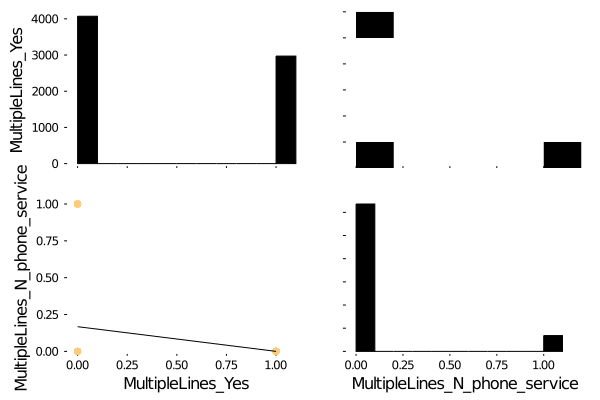

In [87]:
@df churn_df corrplot([:MultipleLines_Yes :MultipleLines_N_phone_service],grid=false)

In [88]:
describe(churn_df)

33×8 DataFrame
│ Row │ variable                           │ mean     │ min        │ median  │ max        │ nunique │ nmissing │ eltype   │
│     │ Symbol                             │ Union…   │ Any        │ Union…  │ Any        │ Union…  │ Nothing  │ DataType │
├─────┼────────────────────────────────────┼──────────┼────────────┼─────────┼────────────┼─────────┼──────────┼──────────┤
│ 1   │ customerID                         │          │ 0002-ORFBO │         │ 9995-HOTOH │ 7043    │          │ String   │
│ 2   │ SeniorCitizen                      │ 0.162147 │ 0          │ 0.0     │ 1          │         │          │ Int64    │
│ 3   │ Partner                            │ 0.483033 │ 0.0        │ 0.0     │ 1.0        │         │          │ Float64  │
│ 4   │ Dependents                         │ 0.299588 │ 0.0        │ 0.0     │ 1.0        │         │          │ Float64  │
│ 5   │ tenure                             │ 32.3711  │ 0          │ 29.0    │ 72         │         │          │ Int64    │
│ 6   │ PhoneService                       │ 0.903166 │ 0.0        │ 1.0     │ 1.0        │         │          │ Float64  │
│ 7   │ PaperlessBilling                   │ 0.592219 │ 0.0        │ 1.0     │ 1.0        │         │          │ Float64  │
│ 8   │ MonthlyCharges                     │ 64.7617  │ 18.25      │ 70.35   │ 118.75     │         │          │ Float64  │
│ 9   │ TotalCharges                       │ 2279.73  │ 0.0        │ 1394.55 │ 8684.8     │         │          │ Float64  │
│ 10  │ Churn                              │ 0.26537  │ 0          │ 0.0     │ 1          │         │          │ Int64    │
⋮
│ 23  │ StreamingTV_Yes                    │ 0.384353 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 24  │ StreamingTV_N_internet_service     │ 0.216669 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 25  │ StreamingMovies_Yes                │ 0.387903 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 26  │ StreamingMovies_N_internet_service │ 0.216669 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 27  │ Contract_Month-to-month            │ 0.550192 │ 0          │ 1.0     │ 1          │         │          │ Bool     │
│ 28  │ Contract_One_year                  │ 0.209144 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 29  │ Contract_Two_year                  │ 0.240664 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 30  │ PaymentMethod_Electronic_check     │ 0.335794 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 31  │ PaymentMethod_Mailed_check         │ 0.22888  │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 32  │ PaymentMethod_Bank_transfer        │ 0.219225 │ 0          │ 0.0     │ 1          │         │          │ Bool     │
│ 33  │ PaymentMethod_Credit_card          │ 0.216101 │ 0          │ 0.0     │ 1          │         │          │ Bool     │

In [89]:
# There is no DataFrame predictor api like we did Pandas, but we can construct Matrix using DataFrame easy using convert method.
churn_X = convert(Matrix,select(select(churn_df,Not("Churn")),Not("customerID")))

7043×31 Array{Float64,2}:
 0.0  1.0  0.0   1.0  0.0  1.0   29.85    29.85  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0  34.0  1.0  0.0   56.95  1889.5   0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0   2.0  1.0  1.0   53.85   108.15  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0
 0.0  0.0  0.0  45.0  0.0  0.0   42.3   1840.75  1.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0
 0.0  0.0  0.0   2.0  1.0  1.0   70.7    151.65  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
 0.0  0.0  0.0   8.0  1.0  1.0   99.65   820.5   0.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  

In [90]:
# Since our Y array is binary, need to be converted to Array, not Matrix. It could be vector btw.
churn_Y = convert(Array,churn_df["Churn"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[90]:1
└ @ Core In[90]:1


7043-element Array{Int64,1}:
 0
 0
 1
 0
 1
 1
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 1
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0

In [91]:
# Import statement for LogisticRegressionModel
@sk_import linear_model : LogisticRegression

PyObject <class 'sklearn.linear_model._logistic.LogisticRegression'>

In [92]:
# Assigning model to variable.
log_reg_model = LogisticRegression()

PyObject LogisticRegression()

In [93]:
# model = fit(model) is equal fit!(As I mentioned before).
fit!(log_reg_model,churn_X,churn_Y)

PyObject LogisticRegression()

In [94]:
# Obtaining predicted values.
preds = predict(log_reg_model,churn_X)

7043-element Array{Int64,1}:
 1
 0
 0
 0
 1
 1
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 1
 0
 0
 1
 0
 0
 0
 0
 0
 1
 0

In [95]:
# We could define accuracy score function by comparing 2 array of labels but there is defined one:P
@sk_import metrics : accuracy_score

PyObject <function accuracy_score at 0x00000000021941F0>

In [96]:
# It works, but classes are imbalanced. We need to use precision, recall to gain insights. Or combining two of them getting
# FScore
accuracy_score(preds,churn_Y)

0.8071844384495244

In [97]:
# It is forgetten. We need to correct it in order to make it accessible using name.
churn_df["InternetService_Fiber_optic"] = churn_df["InternetService_Fiber optic"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[97]:1
└ @ Core In[97]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[97]:1
└ @ Core In[97]:1


7043-element Array{Bool,1}:
 0
 0
 0
 0
 1
 1
 1
 0
 1
 0
 0
 0
 1
 ⋮
 0
 1
 1
 1
 1
 0
 0
 0
 1
 0
 1
 1

In [98]:
# Dropping old column.
select!(churn_df,Not("InternetService_Fiber optic"))

7043×33 DataFrame
│ Row  │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PhoneService │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineSecurity_N_internet_service │ OnlineBackup_Yes │ OnlineBackup_N_internet_service │ DeviceProtection_Yes │ DeviceProtection_N_internet_service │ TechSupport_Yes │ TechSupport_N_internet_service │ StreamingTV_Yes │ StreamingTV_N_internet_service │ StreamingMovies_Yes │ StreamingMovies_N_internet_service │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │
│      │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64      │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool                              │ Bool             │ Bool                            │ Bool                 │ Bool                                │ Bool            │ Bool                           │ Bool            │ Bool                           │ Bool                │ Bool                               │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │
├──────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼───────────────────────────────────┼──────────────────┼─────────────────────────────────┼──────────────────────┼─────────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────────┼────────────────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┤
│ 1    │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 0.0          │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 0                                 │ 1                │ 0                               │ 0                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │
│ 2    │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 1.0          │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                                 │ 0                │ 0                               │ 1                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │
│ 3    │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0          │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0       

In [99]:
first(churn_df,5)

5×33 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PhoneService │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineSecurity_N_internet_service │ OnlineBackup_Yes │ OnlineBackup_N_internet_service │ DeviceProtection_Yes │ DeviceProtection_N_internet_service │ TechSupport_Yes │ TechSupport_N_internet_service │ StreamingTV_Yes │ StreamingTV_N_internet_service │ StreamingMovies_Yes │ StreamingMovies_N_internet_service │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │
│     │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64      │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool                              │ Bool             │ Bool                            │ Bool                 │ Bool                                │ Bool            │ Bool                           │ Bool            │ Bool                           │ Bool                │ Bool                               │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │
├─────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼───────────────────────────────────┼──────────────────┼─────────────────────────────────┼──────────────────────┼─────────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────────┼────────────────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 0.0          │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 0                                 │ 1                │ 0                               │ 0                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 1.0          │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                                 │ 0                │ 0                               │ 1                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0          │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                

In [100]:
# There is some negatively correlated values because some columns keep No_Phone_Service information in row.
Statistics.cor(churn_df[!,:MultipleLines_N_phone_service],churn_df[!,:PhoneService])

-1.0

In [101]:
# Samely as before.
Statistics.cor(churn_df[!,:OnlineBackup_N_internet_service],churn_df[!,:OnlineSecurity_N_internet_service])

1.0

In [102]:
# Dropping useless column.
first(select!(churn_df,Not("PhoneService")),20)

20×32 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineSecurity_N_internet_service │ OnlineBackup_Yes │ OnlineBackup_N_internet_service │ DeviceProtection_Yes │ DeviceProtection_N_internet_service │ TechSupport_Yes │ TechSupport_N_internet_service │ StreamingTV_Yes │ StreamingTV_N_internet_service │ StreamingMovies_Yes │ StreamingMovies_N_internet_service │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │
│     │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool                              │ Bool             │ Bool                            │ Bool                 │ Bool                                │ Bool            │ Bool                           │ Bool            │ Bool                           │ Bool                │ Bool                               │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │
├─────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼───────────────────────────────────┼──────────────────┼─────────────────────────────────┼──────────────────────┼─────────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────┼────────────────────────────────┼─────────────────────┼────────────────────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 0                                 │ 1                │ 0                               │ 0                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                                 │ 0                │ 0                               │ 1                    │ 0                                   │ 0               │ 0                              │ 0               │ 0                              │ 0                   │ 0                                  │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 0          

In [103]:
# Same error for No Internet Service, defined which columns to drop.
to_drop = [x for x in names(churn_df) if occursin("N_internet",x)]

6-element Array{String,1}:
 "OnlineSecurity_N_internet_service"
 "OnlineBackup_N_internet_service"
 "DeviceProtection_N_internet_service"
 "TechSupport_N_internet_service"
 "StreamingTV_N_internet_service"
 "StreamingMovies_N_internet_service"

In [104]:
# Assigning one of them, so we can use one of 6 instead of fully correlated 6.
churn_df["No_Internet_Service"] = churn_df["OnlineSecurity_N_internet_service"]

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[104]:1
└ @ Core In[104]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[104]:1
└ @ Core In[104]:1


7043-element Array{Bool,1}:
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 0
 1
 0
 ⋮
 0
 0
 0
 0
 0
 0
 1
 0
 0
 0
 0
 0

In [105]:
select!(churn_df,Not(to_drop))

7043×27 DataFrame
│ Row  │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ No_Internet_Service │
│      │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Bool                │
├──────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼─────────────────────┤
│ 1    │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 0                   │
│ 2    │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 0                   │
│ 3    │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 0                   │
│ 4    │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 45     │ 0.0              │ 42.3           │ 1840.75      │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │ 0                   │
│ 5    │ 9237-HQITU │ 0             │ 0.0     │ 

In [106]:
first(churn_df,5)

5×27 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ No_Internet_Service │
│     │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Bool                │
├─────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼─────────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 0                   │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 0                   │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 0                   │
│ 4   │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 45     │ 0.0              │ 42.3           │ 1840.75      │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │ 0                   │
│ 5   │ 9237-HQITU │ 0             │ 0.0     │ 0.0        

In [107]:
function evaluate_log_reg_model(df)
    churn_X = convert(Matrix,select(select(df,Not("Churn")),Not("customerID")))
    churn_Y = convert(Array, df["Churn"])
    sum(cross_val_score(LogisticRegression(max_iter=5000), churn_X, churn_Y; cv=5))/5
end

evaluate_log_reg_model (generic function with 1 method)

In [108]:
# Accuracy score isn't a good metric if there is imbalancing. Or we could use SMOTE for oversampling to measure accuracy 
# precisely.
evaluate_log_reg_model(churn_df)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evaluate_log_reg_model(::DataFrame) at In[107]:3
└ @ Main .\In[107]:3


UndefVarError: UndefVarError: cross_val_score not defined

In [109]:
gr() 
plot(churn_df["TotalCharges"],churn_df["tenure"] , seriestype = :scatter, title = "My Scatter Plot")

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[109]:2
└ @ Core In[109]:2
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[109]:2
└ @ Core In[109]:2


In [110]:
churn_df["Internet_Service"] = map(x-> x==0 ? 1 : 0,churn_df["No_Internet_Service"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[110]:1
└ @ Core In[110]:1
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[110]:1
└ @ Core In[110]:1


7043-element Array{Int64,1}:
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 1
 0
 1
 ⋮
 1
 1
 1
 1
 1
 1
 0
 1
 1
 1
 1
 1

In [111]:
select!(churn_df,Not("No_Internet_Service"))

7043×27 DataFrame
│ Row  │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ Internet_Service │
│      │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Int64            │
├──────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼──────────────────┤
│ 1    │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 1                │
│ 2    │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │
│ 3    │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │
│ 4    │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 45     │ 0.0              │ 42.3           │ 1840.75      │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │ 1                │
│ 5    │ 9237-HQITU │ 0             │ 0.0     │ 0.0        │ 2      │

In [112]:
first(churn_df,5)

5×27 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ Internet_Service │
│     │ String     │ Int64         │ Float64 │ Float64    │ Int64  │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Int64            │
├─────┼────────────┼───────────────┼─────────┼────────────┼────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼──────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 1      │ 1.0              │ 29.85          │ 29.85        │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 1                │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 34     │ 0.0              │ 56.95          │ 1889.5       │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0              │ 53.85          │ 108.15       │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │
│ 4   │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 45     │ 0.0              │ 42.3           │ 1840.75      │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │ 1                │
│ 5   │ 9237-HQITU │ 0             │ 0.0     │ 0.0        │ 2      │ 1.0       

In [113]:
# By gaining insights, when a customer churn, there is probably month-to-month membership, keeping just one of them might 
# increase our metrics. We'll see by experimenting it.
total_services_df = churn_df[11:26][[x for x in names(churn_df[11:26]) if !occursin("Contract",x)]]

┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[113]:1
└ @ Core In[113]:1
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[113]:1
└ @ Core In[113]:1
┌ Warning: `getindex(df::DataFrame, col_inds::Union{AbstractVector, Regex, Not})` is deprecated, use `df[:, col_inds]` instead.
│   caller = top-level scope at In[113]:1
└ @ Core In[113]:1


7043×13 DataFrame
│ Row  │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │
│      │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │
├──────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┤
│ 1    │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │
│ 2    │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │
│ 3    │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │
│ 4    │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │
│ 5    │ 0                 │ 0                   │ 0                  │ 0                │ 0                    │ 0               │ 0               │ 0                   │ 1                              │ 0                          │ 0                           │ 0                         │ 1                           │
│ 6    │ 1                 │ 0                   │ 0                  │ 0                │ 1                    │ 0               │ 1               │ 1                   │ 1                              │ 0                          │ 0                           │ 0                         │ 1                           │
│ 7    │ 1                 │ 0                   │ 0                  │ 1                │ 0                    │ 0               │ 1               │ 0                   │ 0                              │ 0                          │ 0                           │ 1                         │ 1                           │
│ 8    │ 0                 │ 1                   │ 1                  │ 0                │ 0                    │ 0               │ 0               │ 0                   │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │
│ 9    │ 1                 │ 0                   │ 0                  │ 0                │ 1                    │ 1               │ 1               │ 1                   │ 1                              │ 0                          │ 0                           │ 0                         │ 1                           │
│ 10   │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0   

In [114]:
# Adding column how many service a user using.
churn_df["Total_Service_Used"] = sum.(eachrow(total_services_df))

┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = top-level scope at In[114]:1
└ @ Core In[114]:1


7043-element Array{Int64,1}:
 3
 4
 4
 5
 2
 6
 5
 3
 7
 4
 3
 1
 6
 ⋮
 5
 3
 2
 7
 3
 7
 1
 8
 7
 3
 3
 7

In [115]:
# Declaring a function to normalize a numerical column.
function normalize_col(col)
    churn_df[col] = map(x-> x/maximum(churn_df[col]),churn_df[col])
end

normalize_col (generic function with 1 method)

In [116]:
# Defining which columns to normalize
col_to_normalize = ["tenure","MonthlyCharges","TotalCharges"]

3-element Array{String,1}:
 "tenure"
 "MonthlyCharges"
 "TotalCharges"

In [117]:
# Normalizing columns
for vl in col_to_normalize
    normalize_col(vl)
end

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = normalize_col(::String) at In[115]:3
└ @ Main .\In[115]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::var"#69#70"{String})(::Int64) at In[115]:3
└ @ Main .\In[115]:3
┌ Warning: `setindex!(df::DataFrame, v::AbstractVector, col_ind::ColumnIndex)` is deprecated, use `begin
│     df[!, col_ind] = v
│     df
│ end` instead.
│   caller = normalize_col(::String) at In[115]:3
└ @ Main .\In[115]:3
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = (::var"#69#70"{String})(::Float64) at In[115]:3
└ @ Main .\In[115]:3


In [118]:
# What you see, what you get.
describe(churn_df)

28×8 DataFrame
│ Row │ variable                       │ mean      │ min        │ median   │ max        │ nunique │ nmissing │ eltype   │
│     │ Symbol                         │ Union…    │ Any        │ Union…   │ Any        │ Union…  │ Nothing  │ DataType │
├─────┼────────────────────────────────┼───────────┼────────────┼──────────┼────────────┼─────────┼──────────┼──────────┤
│ 1   │ customerID                     │           │ 0002-ORFBO │          │ 9995-HOTOH │ 7043    │          │ String   │
│ 2   │ SeniorCitizen                  │ 0.162147  │ 0          │ 0.0      │ 1          │         │          │ Int64    │
│ 3   │ Partner                        │ 0.483033  │ 0.0        │ 0.0      │ 1.0        │         │          │ Float64  │
│ 4   │ Dependents                     │ 0.299588  │ 0.0        │ 0.0      │ 1.0        │         │          │ Float64  │
│ 5   │ tenure                         │ 0.449599  │ 0.0        │ 0.402778 │ 1.0        │         │          │ Float64  │
│ 6   │ PaperlessBilling               │ 0.592219  │ 0.0        │ 1.0      │ 1.0        │         │          │ Float64  │
│ 7   │ MonthlyCharges                 │ 0.545362  │ 0.153684   │ 0.592421 │ 1.0        │         │          │ Float64  │
│ 8   │ TotalCharges                   │ 0.262497  │ 0.0        │ 0.160574 │ 1.0        │         │          │ Float64  │
│ 9   │ Churn                          │ 0.26537   │ 0          │ 0.0      │ 1          │         │          │ Int64    │
│ 10  │ MultipleLines_N_phone_service  │ 0.0968337 │ 0          │ 0.0      │ 1          │         │          │ Bool     │
⋮
│ 18  │ StreamingMovies_Yes            │ 0.387903  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 19  │ Contract_Month-to-month        │ 0.550192  │ 0          │ 1.0      │ 1          │         │          │ Bool     │
│ 20  │ Contract_One_year              │ 0.209144  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 21  │ Contract_Two_year              │ 0.240664  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 22  │ PaymentMethod_Electronic_check │ 0.335794  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 23  │ PaymentMethod_Mailed_check     │ 0.22888   │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 24  │ PaymentMethod_Bank_transfer    │ 0.219225  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 25  │ PaymentMethod_Credit_card      │ 0.216101  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 26  │ InternetService_Fiber_optic    │ 0.439585  │ 0          │ 0.0      │ 1          │         │          │ Bool     │
│ 27  │ Internet_Service               │ 0.783331  │ 0          │ 1.0      │ 1          │         │          │ Int64    │
│ 28  │ Total_Service_Used             │ 4.24308   │ 1          │ 4.0      │ 9          │         │          │ Int64    │

In [119]:
Pkg.add("MLBase")
using MLBase

  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]


In [120]:
function evaluate_log_reg_model_w_conf(df)
    churn_X = convert(Matrix,select(select(df,Not("Churn")),Not("customerID")))
    churn_Y = convert(Array, df["Churn"])
    log_reg_model = LogisticRegression(max_iter=5000)
    fit!(log_reg_model,churn_X,churn_Y)
    preds = predict(log_reg_model,churn_X)
    return (roc(churn_Y,preds))
end

evaluate_log_reg_model_w_conf (generic function with 1 method)

In [121]:
# Using ML Base, we get RocNums. It keeps, positive, negative, true positive, true negative etc... So we can calculate precision
# recall, f score.
r1 = evaluate_log_reg_model_w_conf(churn_df)

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evaluate_log_reg_model_w_conf(::DataFrame) at In[120]:3
└ @ Main .\In[120]:3


ROCNums{Int64}
  p = 1869
  n = 5174
  tp = 1028
  tn = 4646
  fp = 528
  fn = 841


In [122]:
# Precision score 
prec1 = r1.tp / (r1.tp + r1.fp)

0.6606683804627249

In [123]:
# Recall Score
rec1 = r1.tp / (r1.tp + r1.fn)

0.5500267522739433

In [124]:
# Fscore
(2 * prec1 * rec1) / (prec1 + rec1)

0.6002919708029196

In [125]:
testing_cols_vis = [x for x in names(select(churn_df,Not("Contract_Month-to-month"))) if occursin("Contract",x)]

2-element Array{String,1}:
 "Contract_One_year"
 "Contract_Two_year"

In [126]:
function test_contract(tcv)
    return select(select(churn_df,Not(tcv[1])),Not(tcv[2]))
end

test_contract (generic function with 1 method)

In [127]:
updated_df = test_contract(testing_cols_vis)

7043×26 DataFrame
│ Row  │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure    │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ Internet_Service │ Total_Service_Used │
│      │ String     │ Int64         │ Float64 │ Float64    │ Float64   │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Int64            │ Int64              │
├──────┼────────────┼───────────────┼─────────┼────────────┼───────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼──────────────────┼────────────────────┤
│ 1    │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 0.0138889 │ 1.0              │ 0.251368       │ 0.00343704   │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 1                │ 3                  │
│ 2    │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 0.472222  │ 0.0              │ 0.479579       │ 0.217564     │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │ 4                  │
│ 3    │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 0.0277778 │ 1.0              │ 0.453474       │ 0.0124528    │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │ 4                  │
│ 4    │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 0.625     │ 0.0              │ 0.356211       │ 0.211951     │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │ 1                │ 5                  │
│ 5    │ 9237-HQITU │ 0             │ 0.0     │ 0.0        │ 0.0277778 │ 1.0              │ 0.595368       │ 0.0174615    │ 1     │ 0                             │ 0                

In [128]:
first(updated_df,5)

5×26 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure    │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ Internet_Service │ Total_Service_Used │
│     │ String     │ Int64         │ Float64 │ Float64    │ Float64   │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Int64            │ Int64              │
├─────┼────────────┼───────────────┼─────────┼────────────┼───────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼──────────────────┼────────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 0.0138889 │ 1.0              │ 0.251368       │ 0.00343704   │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 1                │ 3                  │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 0.472222  │ 0.0              │ 0.479579       │ 0.217564     │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │ 4                  │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 0.0277778 │ 1.0              │ 0.453474       │ 0.0124528    │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │ 4                  │
│ 4   │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 0.625     │ 0.0              │ 0.356211       │ 0.211951     │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 0                              │ 0                          │ 1                           │ 0                         │ 0                           │ 1                │ 5                  │
│ 5   │ 9237-HQITU │ 0             │ 0.0     │ 0.0        │ 0.0277778 │ 1.0              │ 0.595368       │ 0.0174615    │ 1     │ 0                             │ 0                 │ 0       

In [129]:
# Using month-to-month column instead of using all type of membership.
r2 = evaluate_log_reg_model_w_conf(updated_df)

ROCNums{Int64}
  p = 1869
  n = 5174
  tp = 1030
  tn = 4641
  fp = 533
  fn = 839


In [130]:
# Precision score
prec2 = r2.tp / (r2.tp + r2.fp)

0.6589891234804862

In [131]:
# Recall score
rec2 = r2.tp / (r2.tp + r2.fn)

0.5510968432316747

In [132]:
# Fscore
(2 * prec2 * rec2) / (prec2 + rec2)

0.6002331002331003

In [133]:
# By substracting one-year and two year membership and using just month-to-month, we get decreased precision values and 
# increased recall values. In case of business domain, this metrics can depend. If we want only really churners, we have to use
# recall. We already found that month-to-month creates big part of Contract Column.

In [134]:
# Looking col sum of categorical variables, checking is there any very low values or high values.
sum.(eachcol(churn_df[!,10:28]))

19-element Array{Int64,1}:
   682
  2971
  2421
  2019
  2429
  2422
  2044
  2707
  2732
  3875
  1473
  1695
  2365
  1612
  1544
  1522
  3096
  5517
 29884

In [135]:
# Since we used linear model, we need to look non-linear models to construct greater model with good confusion mtx.

In [136]:
first(churn_df,5)

5×28 DataFrame
│ Row │ customerID │ SeniorCitizen │ Partner │ Dependents │ tenure    │ PaperlessBilling │ MonthlyCharges │ TotalCharges │ Churn │ MultipleLines_N_phone_service │ MultipleLines_Yes │ InternetService_DSL │ OnlineSecurity_Yes │ OnlineBackup_Yes │ DeviceProtection_Yes │ TechSupport_Yes │ StreamingTV_Yes │ StreamingMovies_Yes │ Contract_Month-to-month │ Contract_One_year │ Contract_Two_year │ PaymentMethod_Electronic_check │ PaymentMethod_Mailed_check │ PaymentMethod_Bank_transfer │ PaymentMethod_Credit_card │ InternetService_Fiber_optic │ Internet_Service │ Total_Service_Used │
│     │ String     │ Int64         │ Float64 │ Float64    │ Float64   │ Float64          │ Float64        │ Float64      │ Int64 │ Bool                          │ Bool              │ Bool                │ Bool               │ Bool             │ Bool                 │ Bool            │ Bool            │ Bool                │ Bool                    │ Bool              │ Bool              │ Bool                           │ Bool                       │ Bool                        │ Bool                      │ Bool                        │ Int64            │ Int64              │
├─────┼────────────┼───────────────┼─────────┼────────────┼───────────┼──────────────────┼────────────────┼──────────────┼───────┼───────────────────────────────┼───────────────────┼─────────────────────┼────────────────────┼──────────────────┼──────────────────────┼─────────────────┼─────────────────┼─────────────────────┼─────────────────────────┼───────────────────┼───────────────────┼────────────────────────────────┼────────────────────────────┼─────────────────────────────┼───────────────────────────┼─────────────────────────────┼──────────────────┼────────────────────┤
│ 1   │ 7590-VHVEG │ 0             │ 1.0     │ 0.0        │ 0.0138889 │ 1.0              │ 0.251368       │ 0.00343704   │ 0     │ 1                             │ 0                 │ 1                   │ 0                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 1                              │ 0                          │ 0                           │ 0                         │ 0                           │ 1                │ 3                  │
│ 2   │ 5575-GNVDE │ 0             │ 0.0     │ 0.0        │ 0.472222  │ 0.0              │ 0.479579       │ 0.217564     │ 0     │ 0                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 0               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │ 4                  │
│ 3   │ 3668-QPYBK │ 0             │ 0.0     │ 0.0        │ 0.0277778 │ 1.0              │ 0.453474       │ 0.0124528    │ 1     │ 0                             │ 0                 │ 1                   │ 1                  │ 1                │ 0                    │ 0               │ 0               │ 0                   │ 1                       │ 0                 │ 0                 │ 0                              │ 1                          │ 0                           │ 0                         │ 0                           │ 1                │ 4                  │
│ 4   │ 7795-CFOCW │ 0             │ 0.0     │ 0.0        │ 0.625     │ 0.0              │ 0.356211       │ 0.211951     │ 0     │ 1                             │ 0                 │ 1                   │ 1                  │ 0                │ 1                    │ 1               │ 0               │ 0                   │ 0                       │ 1                 │ 0                 │ 0                              │ 0                          │ 1                           │ 0        

In [137]:
Pkg.add("DecisionTree")
Pkg.add("MLDataUtils")
using DecisionTree, MLDataUtils
@sk_import neighbors: KNeighborsClassifier
@sk_import svm: SVC
@sk_import naive_bayes: GaussianNB
@sk_import discriminant_analysis: (LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis)

  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]
  Resolving package versions...
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Project.toml`
 [no changes]
   Updating `C:\Users\CMACH\.julia\environments\v1.4\Manifest.toml`
 [no changes]


PyObject <class 'sklearn.discriminant_analysis.QuadraticDiscriminantAnalysis'>

In [138]:
function evaluate_baseline_models(Xs,Ys)
    Xs, Ys = shuffleobs((transpose(Xs), Ys))
    (X_train1, y_train1), (X_test1, y_test1) = MLDataUtils.splitobs((Xs, Ys); at = 0.75)
    X_train = Array(transpose(X_train1))
    y_train = Array(y_train1)
    X_test = Array(transpose(X_test1))
    y_test = Array(y_test1)
    models = Dict("RandomForest"=>RandomForestClassifier(),"LogisticRegression"=>LogisticRegression(max_iter=5000)
            ,"DecisionTreeClassifier"=>DecisionTreeClassifier(),"KNNClassifier"=>KNeighborsClassifier()
            ,"LineerSVM" =>SVC(kernel="linear"),"SVM"=>SVC(),"AdaBoost"=>AdaBoostStumpClassifier()
            ,"GaussianNB" =>GaussianNB(),"Linear Discriminant Analysis"=>LinearDiscriminantAnalysis(),
         "Quadratic Discriminant Analysis"=>QuadraticDiscriminantAnalysis())
    
    model_names = String[]
    model_accs = Float64[]
    model_prec = Float64[]
    model_recall = Float64[]
    model_fsc = Float64[]
    for (ky,model) in models
        fit!(model, X_train, y_train)
        y_pred = predict(model, hcat(X_test))
        r = roc(y_test,y_pred)
        precs = r.tp / (r.tp + r.fp)
        recall = r.tp / (r.tp + r.fn)
        push!(model_names,ky)
        push!(model_accs,accuracy_score(y_pred,y_test))
        push!(model_prec,precs)
        push!(model_recall,recall)
        push!(model_fsc,(2 * precs * recall) / (precs + recall))
    end
    return DataFrame(Name = model_names, Accuracy = model_accs,Precision=model_prec,Recall=model_recall,FScore=model_fsc)
end

evaluate_baseline_models (generic function with 1 method)

In [139]:
# There is no DataFrame predictor api like we did Pandas, but we can construct Matrix using DataFrame easy using convert method.
churn_X = convert(Matrix,select(select(churn_df,Not("Churn")),Not("customerID")))
churn_Y = convert(Array,churn_df["Churn"])

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[139]:3
└ @ Core In[139]:3


7043-element Array{Int64,1}:
 0
 0
 1
 0
 1
 1
 0
 0
 1
 0
 0
 0
 0
 ⋮
 0
 1
 0
 1
 0
 0
 0
 0
 0
 0
 1
 0

In [140]:
evaluate_baseline_models(churn_X,churn_Y)

C:\Users\CMACH\.julia\conda\3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


10×5 DataFrame
│ Row │ Name                            │ Accuracy │ Precision │ Recall   │ FScore   │
│     │ String                          │ Float64  │ Float64   │ Float64  │ Float64  │
├─────┼─────────────────────────────────┼──────────┼───────────┼──────────┼──────────┤
│ 1   │ RandomForest                    │ 0.79841  │ 0.654762  │ 0.479303 │ 0.553459 │
│ 2   │ SVM                             │ 0.819989 │ 0.698324  │ 0.544662 │ 0.611995 │
│ 3   │ Linear Discriminant Analysis    │ 0.810335 │ 0.651332  │ 0.586057 │ 0.616972 │
│ 4   │ LineerSVM                       │ 0.817717 │ 0.669951  │ 0.592593 │ 0.628902 │
│ 5   │ LogisticRegression              │ 0.814878 │ 0.670951  │ 0.568627 │ 0.615566 │
│ 6   │ KNNClassifier                   │ 0.762067 │ 0.54386   │ 0.540305 │ 0.542077 │
│ 7   │ AdaBoost                        │ 0.789324 │ 0.678862  │ 0.363834 │ 0.473759 │
│ 8   │ GaussianNB                      │ 0.747871 │ 0.51073   │ 0.777778 │ 0.61658  │
│ 9   │ DecisionTreeClassifier          │ 0.733674 │ 0.489224  │ 0.494553 │ 0.491874 │
│ 10  │ Quadratic Discriminant Analysis │ 0.724588 │ 0.482432  │ 0.777778 │ 0.595496 │

In [141]:
# There are no major differences in accuracy. But In Recall, GaussianNB made a great job based on Recall. 
# Anyway, we need to tune baseline models using GridSearch.

In [142]:
using ScikitLearn.GridSearch: GridSearchCV

In [143]:
#Getting possible parameters
LogisticRegression().get_params().keys

64-element Array{Any,1}:
 #undef
    "penalty"
    "fit_intercept"
 #undef
 #undef
    "C"
    "multi_class"
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
   ⋮
 #undef
    "warm_start"
    "intercept_scaling"
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef

In [144]:
gridsearch = GridSearchCV(LogisticRegression(max_iter=5000), Dict(:C => 0.1:0.1:2.0,:fit_intercept=>[true,false]))
fit!(gridsearch, churn_X, churn_Y)
println("Best hyper-parameters: $(gridsearch.best_params_)")
# Best hyper-parameters: Dict{Symbol,Any}(:fit_intercept => false,:C => 0.7)

Best hyper-parameters: Dict{Symbol,Any}(:fit_intercept => false,:C => 0.7)


In [145]:
gridsearch = GridSearchCV(RandomForestClassifier(), 
    Dict(:n_trees => 10:10:100,:partial_sampling=>0.1:0.5:1.0,:max_depth=>1:1:10,:min_samples_leaf=>5:2:10))
fit!(gridsearch, churn_X, churn_Y)
println("Best hyper-parameters: $(gridsearch.best_params_)")
# Best hyper-parameters: Dict{Symbol,Any}(:partial_sampling => 0.6,:n_trees => 70,:min_samples_leaf => 7,:max_depth => 8)
# Best hyper-parameters: Dict{Symbol,Any}(:partial_sampling => 0.6,:n_trees => 70,:min_samples_leaf => 7,:max_depth => 10)

Best hyper-parameters: Dict{Symbol,Any}(:partial_sampling => 0.6,:n_trees => 50,:min_samples_leaf => 9,:max_depth => 8)


In [146]:
SVC().get_params().keys

64-element Array{Any,1}:
 #undef
 #undef
 #undef
 #undef
 #undef
    "C"
    "shrinking"
 #undef
 #undef
 #undef
 #undef
 #undef
 #undef
   ⋮
 #undef
 #undef
    "kernel"
    "probability"
    "cache_size"
    "gamma"
    "degree"
 #undef
    "break_ties"
 #undef
 #undef
 #undef

In [147]:
gridsearch = GridSearchCV(SVC(), 
    Dict(:C => 0.1:0.5:10,:gamma =>["scale","auto"]))
fit!(gridsearch, churn_X, churn_Y)
println("Best hyper-parameters: $(gridsearch.best_params_)")

Best hyper-parameters: Dict{Symbol,Any}(:gamma => "scale",:C => 2.6)


In [148]:
SVC(kernel="linear").get_params()

Dict{Any,Any} with 15 entries:
  "C"                       => 1.0
  "shrinking"               => true
  "decision_function_shape" => "ovr"
  "max_iter"                => -1
  "random_state"            => nothing
  "class_weight"            => nothing
  "tol"                     => 0.001
  "verbose"                 => false
  "coef0"                   => 0.0
  "kernel"                  => "linear"
  "probability"             => false
  "cache_size"              => 200
  "gamma"                   => "scale"
  "degree"                  => 3
  "break_ties"              => false

In [149]:
gridsearch = GridSearchCV(SVC(kernel="linear"), 
    Dict(:C => 0.1:0.5:10,:gamma =>["scale","auto"]))
fit!(gridsearch, churn_X, churn_Y)
println("Best hyper-parameters: $(gridsearch.best_params_)")

Best hyper-parameters: Dict{Symbol,Any}(:gamma => "scale",:C => 0.1)


In [150]:
GaussianNB

PyObject <class 'sklearn.naive_bayes.GaussianNB'>

In [152]:
GaussianNB().get_params()

Dict{Any,Any} with 2 entries:
  "var_smoothing" => 1.0e-9
  "priors"        => nothing

In [169]:
gridsearch = GridSearchCV(GaussianNB(), 
    Dict(:var_smoothing => [1e-15,1e-14,1e-13,1e-12,1e-11,1e-10,1e-9,1e-8,1e-7,1e-6,1e-5,0.0,0.1,0.125,0.150,0.175,0.195,0.2,0.21,0.25,0.275,0.3,0.4,0.5,0.9]))
fit!(gridsearch, churn_X, churn_Y)
println("Best hyper-parameters: $(gridsearch.best_params_)")

Best hyper-parameters: Dict{Symbol,Any}(:var_smoothing => 0.2)


In [173]:
AdaBoostStumpClassifier()

AdaBoostStumpClassifier
n_iterations: 10
classes:      nothing
ensemble:     nothing

In [178]:
KNeighborsClassifier().get_params()

Dict{Any,Any} with 8 entries:
  "leaf_size"     => 30
  "n_jobs"        => nothing
  "n_neighbors"   => 5
  "metric"        => "minkowski"
  "weights"       => "uniform"
  "algorithm"     => "auto"
  "metric_params" => nothing
  "p"             => 2

In [182]:
gridsearch = GridSearchCV(KNeighborsClassifier(), 
    Dict(:n_neighbors=>1:1:50))
fit!(gridsearch, churn_X, churn_Y)
println("Best hyper-parameters: $(gridsearch.best_params_)")

Best hyper-parameters: Dict{Symbol,Any}(:n_neighbors => 38)


In [170]:
# Now we have to redefine evaluate models function that ready for tuned models based on previous performances.


In [184]:
function evaluate_tuned_models(Xs,Ys,models= models)
    Xs, Ys = shuffleobs((transpose(Xs), Ys))
    (X_train1, y_train1), (X_test1, y_test1) = MLDataUtils.splitobs((Xs, Ys); at = 0.75)
    X_train = Array(transpose(X_train1))
    y_train = Array(y_train1)
    X_test = Array(transpose(X_test1))
    y_test = Array(y_test1)
    model_names = String[]
    model_accs = Float64[]
    model_prec = Float64[]
    model_recall = Float64[]
    model_fsc = Float64[]
    for (ky,model) in models
        fit!(model, X_train, y_train)
        y_pred = predict(model, hcat(X_test))
        r = roc(y_test,y_pred)
        precs = r.tp / (r.tp + r.fp)
        recall = r.tp / (r.tp + r.fn)
        push!(model_names,ky)
        push!(model_accs,accuracy_score(y_pred,y_test))
        push!(model_prec,precs)
        push!(model_recall,recall)
        push!(model_fsc,(2 * precs * recall) / (precs + recall))
    end
    return DataFrame(Name = model_names, Accuracy = model_accs,Precision=model_prec,Recall=model_recall,FScore=model_fsc)
end

evaluate_tuned_models (generic function with 2 methods)

In [ ]:
:partial_sampling => 0.6,:n_trees => 50,:min_samples_leaf => 9,:max_depth => 8
(:gamma => "scale",:C => 2.6)

In [183]:
models = Dict("RandomForest"=>RandomForestClassifier(partial_sampling=0.6, min_samples_leaf=9, max_depth=8)
                ,"LogisticRegression"=>LogisticRegression(max_iter=5000,fit_intercept=false,C=0.7)
                ,"KNNClassifier"=>KNeighborsClassifier(n_neighbors=38)
                ,"LineerSVM" =>SVC(kernel="linear",gamma="scale",C=0.1),"SVM"=>SVC(gamma="scale",C=2.6)
                ,"AdaBoost"=>AdaBoostStumpClassifier(n_iterations=100)
                ,"GaussianNB" =>GaussianNB(var_smoothing=0.2),"Linear Discriminant Analysis"=>LinearDiscriminantAnalysis()
                 ,"Quadratic Discriminant Analysis"=>QuadraticDiscriminantAnalysis())

Dict{String,Any} with 9 entries:
  "RandomForest"                    => RandomForestClassifier…
  "SVM"                             => PyObject SVC(C=2.6)
  "Linear Discriminant Analysis"    => PyObject LinearDiscriminantAnalysis()
  "LineerSVM"                       => PyObject SVC(C=0.1, kernel='linear')
  "LogisticRegression"              => PyObject LogisticRegression(C=0.7, fit_intercept=False, max_iter=5000)
  "KNNClassifier"                   => PyObject KNeighborsClassifier(n_neighbors=38)
  "AdaBoost"                        => AdaBoostStumpClassifier…
  "GaussianNB"                      => PyObject GaussianNB(var_smoothing=0.2)
  "Quadratic Discriminant Analysis" => PyObject QuadraticDiscriminantAnalysis()

In [185]:
evaluate_tuned_models(churn_X,churn_Y,models)

C:\Users\CMACH\.julia\conda\3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


9×5 DataFrame
│ Row │ Name                            │ Accuracy │ Precision │ Recall   │ FScore   │
│     │ String                          │ Float64  │ Float64   │ Float64  │ Float64  │
├─────┼─────────────────────────────────┼──────────┼───────────┼──────────┼──────────┤
│ 1   │ RandomForest                    │ 0.820557 │ 0.733068  │ 0.424942 │ 0.538012 │
│ 2   │ SVM                             │ 0.814878 │ 0.667712  │ 0.491917 │ 0.566489 │
│ 3   │ Linear Discriminant Analysis    │ 0.813742 │ 0.641509  │ 0.549654 │ 0.59204  │
│ 4   │ LineerSVM                       │ 0.806928 │ 0.630252  │ 0.51963  │ 0.56962  │
│ 5   │ LogisticRegression              │ 0.818285 │ 0.657382  │ 0.545035 │ 0.59596  │
│ 6   │ KNNClassifier                   │ 0.802385 │ 0.608696  │ 0.549654 │ 0.57767  │
│ 7   │ AdaBoost                        │ 0.808631 │ 0.646341  │ 0.489607 │ 0.557162 │
│ 8   │ GaussianNB                      │ 0.805792 │ 0.619423  │ 0.545035 │ 0.579853 │
│ 9   │ Quadratic Discriminant Analysis │ 0.759796 │ 0.508013  │ 0.732102 │ 0.599811 │

In [186]:
# CONCLUSION --MORE WORK
# Scaling and dropping correlated columns don't increase accuracy huge.
# Gender isn't important at all.
# Month-to-month-does a great job.
# Non Linear Models gives higher precision scores.
# Linear models gives more accuracy when having low precision-recall scores.
# Models doesn't support all parameters like in Python ScikitLearn.
# Random Forest seems a winner if Precision is case.
# Quadratic Discriminant Analysis Winner if Recall is case.
# Numerical columns doesn't normally distributed. Collecting more data help their distribution.

# Thanks For Reading, Examining It.
# Kemal Emre Çolak